第一步：生成一个正弦波（有四个周期以上，A=100，T=16），请生成noise，强度为20
第二步：去噪，5滑动的平滑（-2，-1,0,1,2），10滑动的平滑
第三步：搜素所有的极值


<ipython-input-6-b0e96a34ab70>:35: RuntimeWarning: invalid value encountered in double_scalars
  xcm = np.sum((x_range*I_range)) / np.sum(I_range)


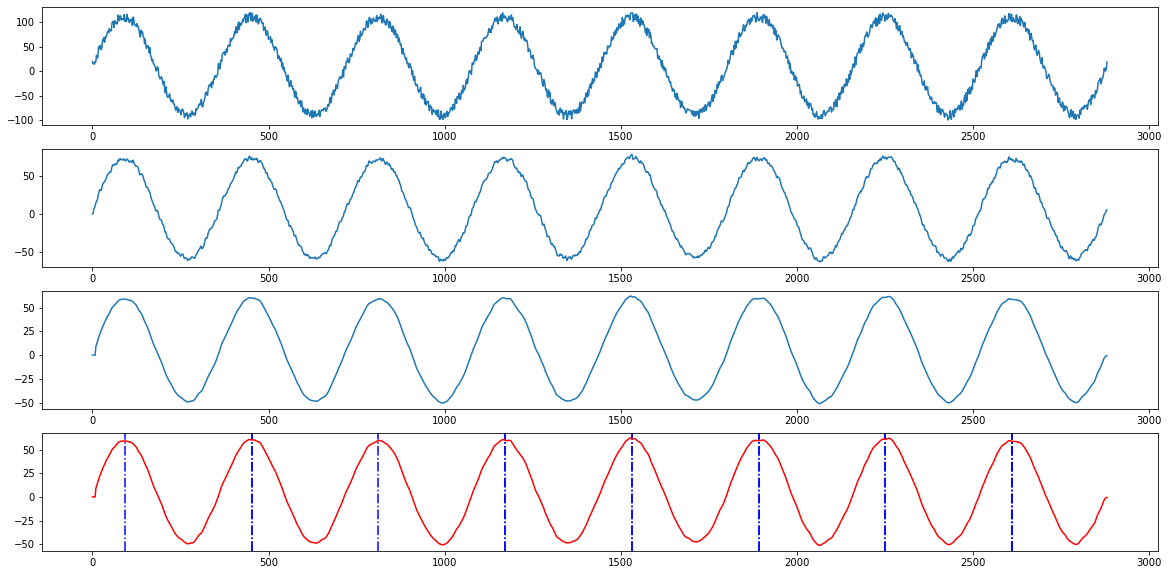

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

fig,ax= plt.subplots(4, 1, figsize=(20, 10))
x = np.linspace(0,180*16,1500)
y1 = 100*np.sin(x*np.pi/180)
noise_1 = 20*np.random.random(1500)
y = y1 + noise_1
ax[0].plot(x,y)

for i in range(1500):
    y[i]=(np.sum(y[i-2:i+2]))/5
ax[1].plot(x,y)

for i in range(1500):
    y[i]=(np.sum(y[i-5:i+5]))/11
ax[2].plot(x,y)

peaks = [] 
for i in range(len(y)-1):
    if (y[i] > y[i+1]) and (y[i]>y[i-1]):
        if (y[i] > y[i-2]) and (y[i] > y[i+2]):
            peaks.append(i)

centroids = []
for i in peaks:
    half_max = y[i] / 2.
    xmin = (np.where(y[i::-1] < half_max)[0])[0]
    xmax = (np.where(y[i:] < half_max)[0])[0]
    x_range = x[i-xmin:i+xmax]
    I_range = y[i-xmin:i+xmax]
    x_range = np.array(x_range)
    I_range = np.array(I_range)
    xcm = np.sum((x_range*I_range)) / np.sum(I_range) 
    centroids.append(xcm) 
    

def plot_vert(x): 
    '''
    Just plots vertical lines, in blue dashes
    '''
    plt.axvline(x, color='blue', ls='-.')
    
for i in centroids[1:]: 
    plot_vert(i)
    
plt.axvline(centroids[0],color='blue',ls='-.',label='Centroid') 
ax[3].plot(x, y, 'r', label='Spectrum')
